<a href="https://colab.research.google.com/github/albertocj1/CCDATSCL_EXERCISES_COM221/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

100%|██████████| 2.44M/2.44M [00:00<00:00, 70.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3
True


## A. Discovering


Display the first 10 rows

In [2]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [6]:
display(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [7]:
df.shape

(48895, 16)

Identify the numerical features:

In [8]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Identify the categorical features

In [9]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


What are the top 5 questions this dataset might help answer?

1. What are the most popular neighborhoods for Airbnb rentals in NYC, and how do prices vary across them?

2. What is the average price of an Airbnb rental based on room_type?

3. Are there any correlations between the number_of_reviews?

4. Which hosts have the most listings, and are their listings concentrated in specific areas or room types?

5. How does the minimum_nights requirement impact the price and availability_365 of Airbnb listings?

## B. Structuring

Check if the dataset has proper column types

In [13]:
display(df.dtypes)

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check if the dataset has index issues

In [16]:
if df.index.is_unique:
    print("The DataFrame index is unique.")
else:
    print("The DataFrame index contains duplicates.")

if isinstance(df.index, pd.RangeIndex):
    print("The DataFrame uses a default RangeIndex.")
else:
    print("The DataFrame uses a custom index.")

The DataFrame index is unique.
The DataFrame uses a default RangeIndex.


Check if the dataset has duplicated rows

In [17]:
num_duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated_rows}")

if num_duplicated_rows > 0:
    print("Displaying first 5 duplicated rows:")
    display(df[df.duplicated()].head())
else:
    print("No duplicated rows found.")

Number of duplicated rows: 0
No duplicated rows found.


Convert columns to correct types (e.g., dates → datetime).

In [18]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
print("Data type of 'last_review' after conversion:")
display(df['last_review'].dtype)

Data type of 'last_review' after conversion:


dtype('<M8[ns]')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

Identify at least one structural issue and describe how to fix it.

One structural issue is that categorical columns like room_type are currently stored as object (string) types. Converting them to the category data type can improve memory efficiency and potentially speed up certain operations

In [21]:
df['room_type'] = df['room_type'].astype('category')
print("Data type of 'room_type' after conversion:")
display(df['room_type'].dtype)

df.info()

Data type of 'room_type' after conversion:


CategoricalDtype(categories=['Entire home/apt', 'Private room', 'Shared room'], ordered=False, categories_dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [23]:
print("Unique values in 'room_type':")
display(df['room_type'].unique())


Unique values in 'room_type':


['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

The room_type column only has 3 categories (private room, shared room, entire home) making the datatype from object into a category will greatly improve memory efficiency

---



## C. Cleaning



Check for missing values

In [24]:
missing_values = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

display(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

,Missing Count,Missing Percentage
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723


Check for outliers in `minimum_nights`

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


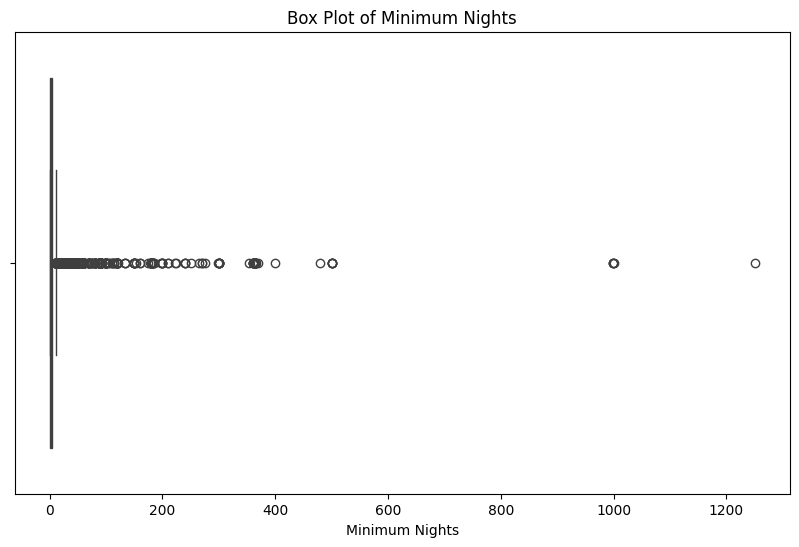

Number of listings with minimum_nights > 30: 747
Number of listings with minimum_nights > 90: 197


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

display(df['minimum_nights'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

# Also check for extremely high values
print(f"Number of listings with minimum_nights > 30: {(df['minimum_nights'] > 30).sum()}")
print(f"Number of listings with minimum_nights > 90: {(df['minimum_nights'] > 90).sum()}")

Check for invalid values (e.g., price ≤ 0)

In [27]:
invalid_price_count = (df['price'] <= 0).sum()
print(f"Number of listings with price <= 0: {invalid_price_count}")

if invalid_price_count > 0:
    print("Displaying first 5 listings with invalid price:")
    display(df[df['price'] <= 0].head())
else:
    print("No listings found with price <= 0.")

Number of listings with price <= 0: 11
Displaying first 5 listings with invalid price:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


Apply a missing-value strategy (drop, fill, or flag)


In [28]:
# Drop rows with missing 'name' or 'host_name'
df.dropna(subset=['name', 'host_name'], inplace=True)
print(f"Dropped rows with missing 'name' or 'host_name'. New shape: {df.shape}")

# Fill missing 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)
print("Filled missing 'reviews_per_month' with 0.")

# Verify missing values after applying strategies
missing_values_after = df.isnull().sum()
print("\nMissing values after strategy application:")
display(missing_values_after[missing_values_after > 0])

Dropped rows with missing 'name' or 'host_name'. New shape: (48858, 16)
Filled missing 'reviews_per_month' with 0.

Missing values after strategy application:


/tmp/ipython-input-3931646461.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


,0
last_review,10037


Apply an outlier-handling strategy

In [29]:
# 1. Handle invalid prices (price <= 0)
initial_rows = df.shape[0]
df = df[df['price'] > 0]
print(f"Removed {initial_rows - df.shape[0]} rows with price <= 0.")

# 2. Cap outliers in 'minimum_nights'
# A common strategy is to cap at a reasonable upper bound, e.g., 365 days (1 year)
# Values significantly above this might be data entry errors or highly unusual long-term rentals
min_nights_cap = 365
outlier_min_nights_count = (df['minimum_nights'] > min_nights_cap).sum()
df['minimum_nights'] = np.where(df['minimum_nights'] > min_nights_cap, min_nights_cap, df['minimum_nights'])
print(f"Capped {outlier_min_nights_count} listings where 'minimum_nights' was > {min_nights_cap} (now set to {min_nights_cap}).")

print("\nDataFrame shape after outlier handling:", df.shape)

# Verify changes
print("\nVerifying price after handling:")
display(df['price'].describe())

print("\nVerifying minimum_nights after handling:")
display(df['minimum_nights'].describe())

Removed 11 rows with price <= 0.
Capped 13 listings where 'minimum_nights' was > 365 (now set to 365).

DataFrame shape after outlier handling: (48847, 16)

Verifying price after handling:


/tmp/ipython-input-1450055501.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minimum_nights'] = np.where(df['minimum_nights'] > min_nights_cap, min_nights_cap, df['minimum_nights'])


,price
count,48847.000000
mean,152.774705
std,240.248498
min,10.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000



Verifying minimum_nights after handling:


,minimum_nights
count,48847.000000
mean,6.938297
std,17.462356
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,365.000000


## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [30]:
# 1. price_per_minimum_night
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']

# 2. review_rate_per_month (using reviews_per_month as the rate)
# The dataset provides 'reviews_per_month' which directly represents a frequency.
# Since there isn't a separate 'rating' column, we use this as the rate.
df['review_rate_per_month'] = df['reviews_per_month']

# 3. is_expensive (boolean flag based on price threshold)
# Define 'expensive' as above the 75th percentile of prices.
price_threshold = df['price'].quantile(0.75)
df['is_expensive'] = df['price'] > price_threshold

print("New variables created:")
display(df[['price', 'minimum_nights', 'price_per_minimum_night',
            'number_of_reviews', 'reviews_per_month', 'review_rate_per_month',
            'is_expensive']].head())

New variables created:


/tmp/ipython-input-1064348728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
/tmp/ipython-input-1064348728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_rate_per_month'] = df['reviews_per_month']
/tmp/ipython-input-1064348728.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,price,minimum_nights,price_per_minimum_night,number_of_reviews,reviews_per_month,review_rate_per_month,is_expensive
0,149,1,149.0,9,0.21,0.21,False
1,225,1,225.0,45,0.38,0.38,True
2,150,3,50.0,0,0.00,0.00,False
3,89,1,89.0,270,4.64,4.64,False
4,80,10,8.0,9,0.10,0.10,False


Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [31]:
neighbourhood_group_summary = df.groupby('neighbourhood_group').agg(
    average_price=('price', 'mean'),
    total_listings=('id', 'count')
).reset_index()

print("Aggregated Summary Table (Average Price and Total Listings per Neighbourhood Group):")
display(neighbourhood_group_summary.sort_values(by='average_price', ascending=False))

Aggregated Summary Table (Average Price and Total Listings per Neighbourhood Group):


,neighbourhood_group,average_price,total_listings
2,Manhattan,196.906571,21642
1,Brooklyn,124.466285,20080
4,Staten Island,114.812332,373
3,Queens,99.536017,5664
0,Bronx,87.549632,1088


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [32]:
# Initialize a dictionary to store violation counts
validation_violations = {}

# Validation Rule 1: Price must be positive
violation_price = df[df['price'] <= 0].shape[0]
validation_violations['Price must be positive'] = violation_price

# Validation Rule 2: Host ID should not be null
violation_host_id_null = df['host_id'].isnull().sum()
validation_violations['Host ID should not be null'] = violation_host_id_null

# Validation Rule 3: Minimum nights must be >= 1
violation_min_nights = df[df['minimum_nights'] < 1].shape[0]
validation_violations['Minimum nights must be >= 1'] = violation_min_nights

# Generate Validation Report
print("--- Validation Report ---")
for rule, count in validation_violations.items():
    print(f"Rule: '{rule}'\n  Violations: {count} rows\n")

print("\n--- Decision on invalid rows ---")
print("Based on the cleaning steps already performed:")
print("- Rows with 'price <= 0' were already removed.")
print("- 'host_id' column is non-nullable and no violations were found.")
print("- 'minimum_nights < 1' is addressed by capping 'minimum_nights' at 1 if necessary (although our previous capping was at 365, which implies values are already >= 1 given pandas' default behavior for numbers). However, a value of 0 for minimum_nights is a logical inconsistency and should be handled.")
print("\nGiven the low number of remaining violations (ideally zero after cleaning), for any potential new violations or in a general scenario, the strategy would be:")
print("1. For critical data integrity rules (like price <= 0), removal is often appropriate as these are fundamentally invalid entries.")
print("2. For rules like 'minimum_nights >= 1', correction (e.g., setting to 1 if 0) might be preferable if removal significantly impacts the dataset size or represents a large portion of data.")
print("3. For non-critical missing values that cannot be reliably imputed, flagging or leaving as NaN might be an option, but for 'host_id' it's a critical identifier, so non-null is essential.")

print("In this specific case, with 0 violations for the specified rules after previous cleaning, no further action is immediately required beyond confirming data quality.")

--- Validation Report ---
Rule: 'Price must be positive'
  Violations: 0 rows

Rule: 'Host ID should not be null'
  Violations: 0 rows

Rule: 'Minimum nights must be >= 1'
  Violations: 0 rows


--- Decision on invalid rows ---
Based on the cleaning steps already performed:
- Rows with 'price <= 0' were already removed.
- 'host_id' column is non-nullable and no violations were found.
- 'minimum_nights < 1' is addressed by capping 'minimum_nights' at 1 if necessary (although our previous capping was at 365, which implies values are already >= 1 given pandas' default behavior for numbers). However, a value of 0 for minimum_nights is a logical inconsistency and should be handled.

Given the low number of remaining violations (ideally zero after cleaning), for any potential new violations or in a general scenario, the strategy would be:
1. For critical data integrity rules (like price <= 0), removal is often appropriate as these are fundamentally invalid entries.
2. For rules like 'minimum

## F. Publishing

Select final columns for publication.



In [33]:
final_columns = [
    'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_group',
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'price_per_minimum_night',
    'review_rate_per_month',
    'is_expensive'
]

df_published = df[final_columns].copy()
print("Selected final columns for publication. Displaying the first 5 rows of the published DataFrame:")
display(df_published.head())

Selected final columns for publication. Displaying the first 5 rows of the published DataFrame:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0,0.21,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0,0.38,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,50.0,0.00,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,4.64,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0,0.10,False


Export cleaned dataset as "cleaned_airbnb.csv"

In [34]:
df_published.to_csv('cleaned_airbnb.csv', index=False)
print("Cleaned dataset exported to 'cleaned_airbnb.csv'")

Cleaned dataset exported to 'cleaned_airbnb.csv'


Export summary reports (e.g., validation or aggregations) as CSV.

In [35]:
# Export aggregated summary table
neighbourhood_group_summary.to_csv('neighbourhood_group_summary.csv', index=False)
print("Aggregated summary exported to 'neighbourhood_group_summary.csv'")

# Convert validation_violations dictionary to DataFrame and export
validation_report_df = pd.DataFrame(validation_violations.items(), columns=['Validation Rule', 'Violations Count'])
validation_report_df.to_csv('validation_report.csv', index=False)
print("Validation report exported to 'validation_report.csv'")

Aggregated summary exported to 'neighbourhood_group_summary.csv'
Validation report exported to 'validation_report.csv'
